In [236]:
import rasterio                          # improting rasterio package to access geospatial raster data, in this case in GeoTIFF format
import matplotlib as mlp                 # needed for styling
from rasterio.plot import show           # visualize multiband imagery
import matplotlib.pyplot as plt          # importing a collection of command style functions we need for plotting the line chart
from matplotlib.colors import LogNorm    # using a logarithmic mapping of values to color scale
import urllib.request              # importing mpdule to open URLs
import zipfile                     # import module to read ZIP archive files
import os

In [237]:
## GETTING THE DATA

# downloading zip file with data, extract it and remove the zip file afterwards 

### ATTENTION!! THIS WILL AUTOMATICALLY DOWNLOAD THE DATA AND STORE IT IN YOUR DIRECTORY (11 files/4,509 KB) ###

urllib.request.urlretrieve("https://www.dropbox.com/s/rdogqlo34djs0s2/02_Raster%20Analysis.zip?dl=1", "02_Raster Analysis.zip")
zf = zipfile.ZipFile("02_Raster Analysis.zip")
zf.extractall()
zf.close()
os.remove("02_Raster Analysis.zip") # clean up

In [245]:
## TOTAL POP

# opening total population tif files 2010 and 2100

pop_2010 = rasterio.open('ssp4_2010.tif')
pop_2100 = rasterio.open('ssp4_2100.tif')

In [246]:
# reading band1 of total population tif files and naming them accordingly

band1_2010 = pop_2010.read(1)
band1_2100 = pop_2100.read(1)

In [240]:
# subtracting population values 2100 from population values 2010 to get the difference 

population_change = band1_2100 - band1_2010     

In [241]:
# setting all positive values to zero, as we are only interested in population decrease

population_change[population_change > 0] = 0

In [242]:
# converting negative numbers into positive values in order to be plotted

population_decrease = [i * -1 for i in population_change]

In [243]:
# Not necessary to obtain the requested outcome but still advisable. Somehow the initial array got converted into a list...

#import numpy as np
#population_decrease = np.array(population_decrease)

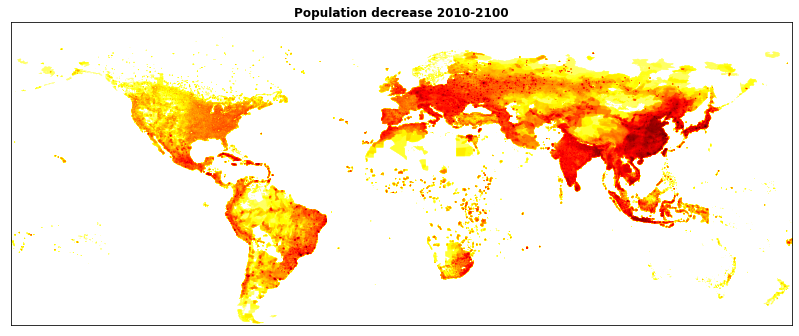

In [244]:
# plotting values into a map

plt.figure(figsize=(14, 14))

plt.yticks([])  # after reading band1 (band1_2010 = pop_2010.read(1)), the raster lost its crs(and became a list) and therefore the axis labeling was wrong. I did not manage to give it back its initial crs (epsg4326) so I decided to remove axis labeling. Slightly cheated but the final outcome is not wrong.   
plt.xticks([])

show((population_decrease), title='Population decrease 2010-2100', norm=LogNorm(), cmap='hot_r')

